# Minería de datos 
##  Avance del Producto Integrador de Aprendizaje
### Base a trabajar: Estadísticas de suicidio de la OMS
#### URL: https://www.kaggle.com/szamil/who-suicide-statistics

#### Integrantes del Equipo 10, grupo 003: 
- Andrea Isabel Cortez Sánchez 1736472
- Sergio Oviedo Martínez 1750532
- Andrés Hernandez de Luna 1757180
- Johan Antonio Sustaita Martinez 1723476

In [18]:
#Mandamos llamar a nuestra base de datos
import pandas
import numpy 
import json 
data1 = pd.read_csv("C:/Users/andhd/Downloads/who_suicide_statistics.csv")

#### Tipo de Datos:

- Estos datos son estadísticas de mortalidad brindada por la OMS. Al observar los datos, puede observar las tendencias a largo plazo y las diferencias entre países, así como dentro de los países en unos pocos grupos demográficos; en ambos casos, verá que estas diferencias pueden ser muy grandes.

- Columna 1 'Country': Nos muestra la país de la que se está hablando.
- Columna 2 'Year': Año del registro.
- Columna 3 'Sex': Género de las personas.
- Columna 4 'Age': Rango de edades.
- Columna 5 'Suicides_no': Número de suicidios.
- Columna 6 'Population': Total de población.

#### Justificación de los datos: 

- La potencia vista en esta base fue el poder concientizar más a la sociedad sobre este delicado tema, pero para eso debemos conocer en que rango de edades y que país es donde se tienen mas registros y así trabajar en una buena campaña para ayudar a quienes más lo necesitan. 
- Hoy en día estamos pasando por una pandemia donde muchos se están resguardando en sus casas para el propio cuidado, pero eso ha afectado un poco la estabilidad emocional de los individuos. Nos gustaría comparar esta base de datos con los nuevos datos registrados durante estos últimos 12 meses.

#### Objetivo:

- Crear un perfil por pais para saber estadisticamente las edades mas propensas del suicidio.

#### Objetivo secundario:

- Definir cuales son los paises con mas y menos suicidios asi como si hay mas masculinos o femeninos

#### Preguntas de interés:

- ¿ Cual es el rango con propensidad al suicidio en hombres?
- ¿ Cual es el rango con propensidad en mujeres?
- ¿ Continente mas propenso a suicidios?
- ¿ Pais con menos casos de suicidio? 



## Parte de programación:

En esta parte del programa postramos todos los datos que tenemos en nuestra base de datos

In [4]:

data1.head() 

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


Numero de filas y columnas con las que cuenta nuestra base de datos

In [5]:

data1.shape 

(43776, 6)

Nos muestra los ultimos 10 datos de nuestra base de datos

In [6]:
 
data1.tail(10) 

,country,year,sex,age,suicides_no,population
43766,Zimbabwe,1990,female,35-54 years,45.0,NaN
43767,Zimbabwe,1990,female,5-14 years,6.0,NaN
43768,Zimbabwe,1990,female,55-74 years,20.0,NaN
43769,Zimbabwe,1990,female,75+ years,3.0,NaN
43770,Zimbabwe,1990,male,15-24 years,132.0,NaN
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


Queremos ver los nombres de nuestras columnas

In [7]:

data1.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

Vemos que los nombres están en inglés, por lo que los cambiamos

In [8]:

a= data1.rename(columns = {'country':'País','year':'Año','sex':'Género','age':'Rango_De_Edad','suicides_no':'Número_De_Suicidios','population':'Población'})

Tipos de datos de nuestras columnas

In [9]:

a.dtypes

País                    object
Año                      int64
Género                  object
Rango_De_Edad           object
Número_De_Suicidios    float64
Población              float64
dtype: object

Tipo de dato para una columna en especifico

In [10]:

a['Año'].dtype 

dtype('int64')

Para tener solo dos tipos de datos en nuestra base, hacemos un cambio de enteros a flotantes

In [11]:

a.Año.astype("float") 

0        1985.0
1        1985.0
2        1985.0
3        1985.0
4        1985.0
          ...  
43771    1990.0
43772    1990.0
43773    1990.0
43774    1990.0
43775    1990.0
Name: Año, Length: 43776, dtype: float64

 informacion resumida de nuestra base de datos

In [12]:

a.describe()

,Año,Número_De_Suicidios,Población
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


Aqui podemos observar el numero total de suicidios por pais

In [13]:

country=a["Número_De_Suicidios"].groupby(a["País"]).sum().sort_values(ascending=False)
country.head(30)

País
Russian Federation          1500992.0
United States of America    1201401.0
Japan                        937614.0
France                       395500.0
Ukraine                      365170.0
Germany                      291262.0
Republic of Korea            261730.0
Brazil                       250824.0
Poland                       172562.0
United Kingdom               166314.0
Italy                        157074.0
Hungary                      130018.0
Thailand                     129899.0
Canada                       128382.0
Kazakhstan                   123151.0
Mexico                       117479.0
Spain                        110097.0
Argentina                     93862.0
Sri Lanka                     80747.0
Australia                     80279.0
Belgium                       75948.0
Belarus                       74974.0
Romania                       72793.0
Netherlands                   60205.0
Austria                       60179.0
Colombia                      54136.0
Czech R

Vemos si existen datos nulos en nuestras columnas
 FALSE = NO ^ TRUE = SÍ

In [14]:

a.isnull().any()

País                   False
Año                    False
Género                 False
Rango_De_Edad          False
Número_De_Suicidios     True
Población               True
dtype: bool

Como obtuvimos que si, contamos En nuestra base de datos el no tener un dato en numero de suicidio puede ser algo positivo y es por eso que tomamos la decisión de no eliminar columnas o filas

In [15]:

a.isnull().sum()

País                      0
Año                       0
Género                    0
Rango_De_Edad             0
Número_De_Suicidios    2256
Población              5460
dtype: int64

LLenamos nuestros espacios nulos con ceros para tener una mejor vista de nuestra base

In [41]:

b = a_0 = a.fillna(0)

Mandamos llamar a nuestra base con los cambios realizados

In [12]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
bd= "C:/Users/andhd/Downloads/who_suicide_statistics.csv"
base= pd.read_csv(bd, header = 0)

## VISUALIZACION
### Mandamos llamar a nuestra base de datos
- Realizamos algunas acciones para poder visualizar y trabajar mejor.

Quisimos manejar el pequeño resumen desde el principio para ver las diferencias a lo largo del trabajo.

In [1]:
import pandas as pd
import numpy as np 
data1 = pd.read_csv("C:/Users/andhd/Downloads/who_suicide_statistics.csv")
df = data1.rename(columns = {'country':'País','year':'Año','sex':'Género','age':'Rango_De_Edad','suicides_no':'Número_De_Suicidios','population':'Población'})
data = df_0 = df.fillna(0)
data.describe()

,Año,Número_De_Suicidios,Población
count,43776.000000,43776.000000,4.377600e+04
mean,1998.502467,183.352865,1.456536e+06
std,10.338711,780.857898,3.456217e+06
min,1979.000000,0.000000,0.000000e+00
25%,1990.000000,0.000000,2.520000e+04
50%,1999.000000,11.000000,2.979955e+05
75%,2007.000000,83.000000,1.067009e+06
max,2016.000000,22338.000000,4.380521e+07


#### Información de estadística básica
- Por lo pronto nos enfocamos en la columna número cinco, para obtener información.

Si realizabamos directamente la función mean (o cualquier otra) con la columa 'Número_De_Suicidios' no tendría tanta coherencia por el echo de que nuestra base de datos contiene más de una fila de un mismo páis. Por lo que, con esta función sumamos el número de suicidios por país independientemente del rango de edad y año.

In [2]:
country = data["Número_De_Suicidios"].groupby(data["País"]).sum().sort_values(ascending=False)
country.head(15)


País
Russian Federation          1500992.0
United States of America    1201401.0
Japan                        937614.0
France                       395500.0
Ukraine                      365170.0
Germany                      291262.0
Republic of Korea            261730.0
Brazil                       250824.0
Poland                       172562.0
United Kingdom               166314.0
Italy                        157074.0
Hungary                      130018.0
Thailand                     129899.0
Canada                       128382.0
Kazakhstan                   123151.0
Name: Número_De_Suicidios, dtype: float64

En la parte superior acomodamos descendientemente, esto quiere decir que nos muestra el país con mayor número de suicidios en primer lugar, en este caso resultó ser la Federación Russa. 

Pero no hay que olvidar que también podemos mostrar el país en último lugar, para ver quién es el páis con menor índice de suicidios.

In [3]:
country.tail(2)

País
Falkland Islands (Malvinas)    1.0
Montserrat                     1.0
Name: Número_De_Suicidios, dtype: float64

Arriba podemos ver un empate en último lugar.

Ahora bien, igual que al principio queremos mostrar el pequeño resumen pero ahora de nuestra data country para comparar los datos a lo largo de la actividad.

In [4]:
country.describe()

count    1.410000e+02
mean     5.692521e+04
std      1.865397e+05
min      1.000000e+00
25%      1.350000e+02
50%      4.447000e+03
75%      2.950400e+04
max      1.500992e+06
Name: Número_De_Suicidios, dtype: float64

Calculando la media del número de suicidios de los países de un determinado lapso de tiempo.


In [5]:
a = country.mean()
print("La media es:", a) # Coinciden

La media es: 56925.21276595745


Al seguir trabajando con nuestra data 'country' calculamos ciertas medidas de dispersión como lo son la varianza, la mediana y la desviación estándar.

In [6]:
print("Mediana: ",country.median())
print("Varianza: ",country.var())
print("Desviación estándar: ",country.std())

Mediana:  4447.0
Varianza:  34797066985.883
Desviación estándar:  186539.71959312848


Al proseguir con el valor de asimetría, nos damos cuenta que es un valor 'positivo' y esto nos indica que la distribución de nuestros datos están sesgados hacia la izquierda.

In [7]:
dd = country.skew()
print("El valor de asimetría es",dd,"mientras que su forma de distribución es",country.kurt())

El valor de asimetría es 5.894440487629342 mientras que su forma de distribución es 38.16214185471467


Como la columna población representa las personas vivas, realizamos lo siguiente:

In [8]:
p = data["Población"].groupby(data["País"]).sum().sort_values(ascending=False)
p.head(5)

País
United States of America    9.637475e+09
Brazil                      5.506640e+09
Russian Federation          4.868343e+09
Japan                       4.340184e+09
Mexico                      3.134138e+09
Name: Población, dtype: float64

Calculamos la suma, la media y otras medidas de dispersión de la población total de los países respecto a los años 1979-2016.

In [9]:
print("Suma:",p.sum())
print("Promedio",p.mean())
print("Mediana:",p.median())
print("Varianza",p.var())
print("Desviación estándar",p.std())

Suma: 63761315943.0
Promedio 452207914.4893617
Mediana: 58977219.0
Varianza 1.3432119247902979e+18
Desviación estándar 1158970200.1303992


Ahora bien, relacionamos nuestras columnas

In [10]:
data.corr()

,Año,Número_De_Suicidios,Población
Año,1.000000,-0.000151,0.020063
Número_De_Suicidios,-0.000151,1.000000,0.606452
Población,0.020063,0.606452,1.000000


In [11]:
data.cov()

,Año,Número_De_Suicidios,Población
Año,106.888949,-1.216759e+00,7.169147e+05
Número_De_Suicidios,-1.216759,6.097391e+05,1.636702e+09
Población,716914.663172,1.636702e+09,1.194544e+13


### Gráfico de Barras

Text(0.5, 1.0, 'Numero de Suicidios por pais')

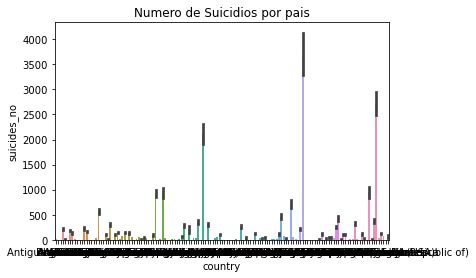

In [24]:
sns.barplot(x=base['country'],y=base['suicides_no'])
plt.title("Numero de Suicidios por pais")

Conclusion: Hay mucha diferencia entre paises, hay unos en los que se nota que tienen alto nivel de suicidios y otros paises muy pocos suicidios

## Gráfico de Pastel

## Sexo

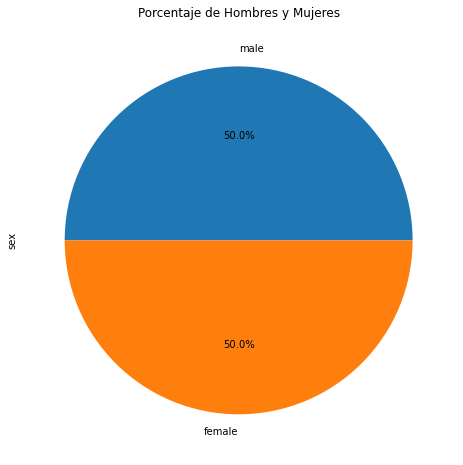

In [39]:
import matplotlib as plt 
from matplotlib import pyplot
from matplotlib import colors 
from matplotlib import cm 
plt.pyplot.figure(figsize=(8,8))
base['sex'].value_counts().plot.pie(autopct="%0.1f%%")
plt.pyplot.title("Porcentaje de Hombres y Mujeres")
plt.pyplot.show()

## Edades

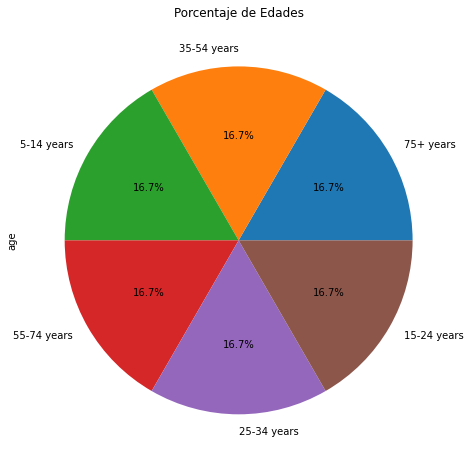

In [38]:
import matplotlib as plt 
from matplotlib import pyplot
from matplotlib import colors 
from matplotlib import cm 
plt.pyplot.figure(figsize=(8,8))
base['age'].value_counts().plot.pie(autopct="%0.1f%%")
plt.pyplot.title("Porcentaje de Edades")
plt.pyplot.show()

## Histograma

## Sexo

<AxesSubplot:xlabel='sex', ylabel='Count'>

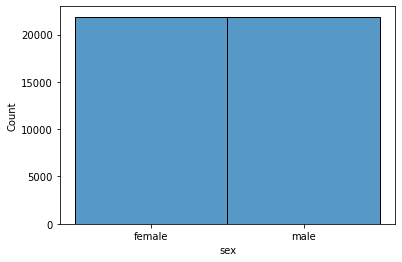

In [34]:
sns.histplot(base["sex"])


## Edades

<AxesSubplot:xlabel='age', ylabel='Count'>

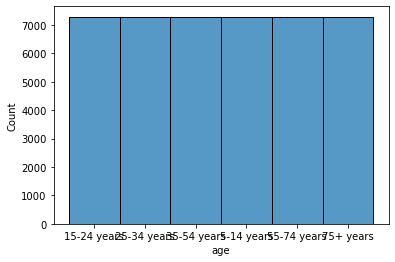

In [35]:
sns.histplot(base["age"])

### Conclusion general
